## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results)

## Summary statistics

In [2]:
df_merged = merged_df.rename(columns={'Mouse ID': 'Mouse_ID', 'Drug Regimen': 'Drug_Regimen', 'Weight (g)': 'Weight_(g)', 
                                      'Tumor Volume (mm3)': 'Tumor_Volume', 'Metastatic Sites': 'Metastatic_Sites'})
df_merged.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = df_merged.groupby('Drug_Regimen').Tumor_Volume.agg(['mean', 'median', 'var', 'std', 'sem'])
stats

,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas


In [5]:
dr_counts = df_merged['Drug_Regimen'].value_counts()

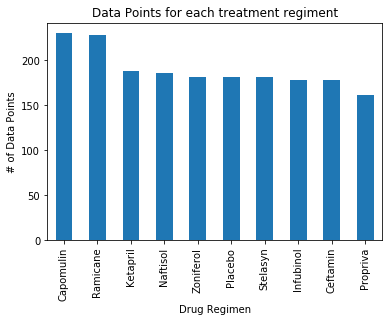

In [6]:
dr_counts.plot(kind='bar', title='Data Points for each treatment regiment')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Data Points')
plt.show()

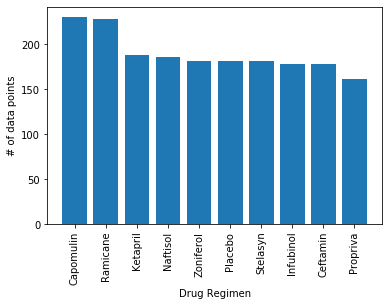

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_list = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva']
plt.bar(drug_list, dr_counts.values)
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('# of data points')
plt.show()

## Pie plots

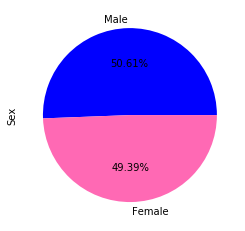

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = df_merged['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.2f%%', colors=['blue', 'hotpink'])
plt.show()

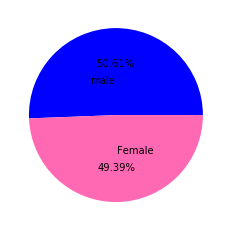

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#sex = ['male', 'female']
plt.pie(sex_counts, labels=['male', 'Female'], autopct='%1.2f%%', colors=['blue', 'hotpink'], labeldistance=.4)
plt.show()

## Quartiles, outliers and boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor = df_merged.groupby(["Mouse_ID"]).max()
final_tumor.head()

,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume,Metastatic_Sites
Mouse_ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1


In [56]:
capomulin_tumor = final_tumor.loc[final_tumor["Drug_Regimen"] == "Capomulin"]['Tumor_Volume']
ramicane_tumor = final_tumor.loc[final_tumor["Drug_Regimen"] == "Ramicane"]['Tumor_Volume']
ketapril_tumor = final_tumor.loc[final_tumor["Drug_Regimen"] == "Ketapril"]['Tumor_Volume']
naftisol_tumor = final_tumor.loc[final_tumor["Drug_Regimen"] == "Naftisol"]['Tumor_Volume']


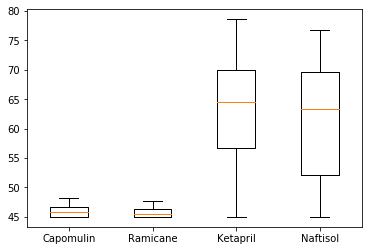

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin_tumor, ramicane_tumor, ketapril_tumor, naftisol_tumor], labels=['Capomulin','Ramicane','Ketapril','Naftisol'])
plt.show()

## Line and scatter plots

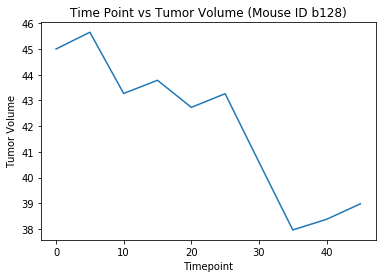

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
b128 = df_merged.loc[df_merged['Mouse_ID']== 'b128']
plt.plot(b128['Timepoint'], b128['Tumor_Volume'])
plt.title('Time Point vs Tumor Volume (Mouse ID b128)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

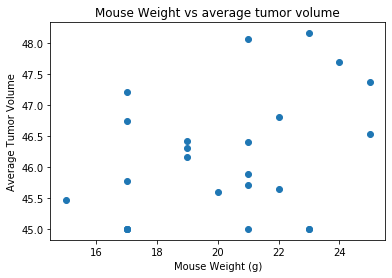

In [88]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = final_tumor.loc[final_tumor["Drug_Regimen"] == "Capomulin"]
avg_tumor_vol = capomulin.groupby(['Mouse_ID']).mean()
plt.scatter(avg_tumor_vol['Weight_(g)'], avg_tumor_vol['Tumor_Volume'])
plt.title('Mouse Weight vs average tumor volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

In [90]:
avg_tumor_vol

,Age_months,Weight_(g),Timepoint,Tumor_Volume,Metastatic_Sites
Mouse_ID,,,,,
b128,9,22,45,45.651331,2
b742,7,21,45,45.000000,0
f966,16,17,20,45.000000,0
g288,3,19,45,46.304003,1
g316,22,22,45,46.809225,2
i557,1,24,45,47.685963,1
i738,23,20,45,45.595685,2
j119,7,23,45,48.158209,1
j246,21,21,35,46.408361,1


The calculated correlation coefficient between mouse weight and average tumor volume is 0.389


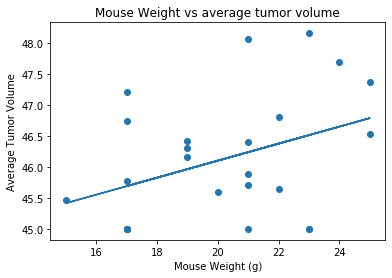

In [96]:
# Calculate the correlation coefficient and linear regression model for 
# mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_tumor_vol['Weight_(g)'], avg_tumor_vol['Tumor_Volume'])[0],3)
print(f"The calculated correlation coefficient between mouse weight and average tumor volume is {correlation}")
lin_regress = st.linregress(avg_tumor_vol['Weight_(g)'], avg_tumor_vol['Tumor_Volume'])
regress = avg_tumor_vol['Weight_(g)'] * lin_regress[0] + lin_regress[1]
plt.scatter(avg_tumor_vol['Weight_(g)'], avg_tumor_vol['Tumor_Volume'])
plt.plot(avg_tumor_vol['Weight_(g)'], regress)
plt.title('Mouse Weight vs average tumor volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()